<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-cyber-data-alchemist/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
# ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.dot(np.dot(W, D), Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


Para realizar este ejercicio vamos a tomar el código de arriba y transformarlo a una función que pida de entrada una matriz y regrese los mismos resultados. Esta función realiza las siguientes acciones:
1. Imprime la matriz original que recibió
2. Regresa tanto los eigenvalores (W) como eigenvectores
3. Utiliza estos eigenvectores (W), su inveresa (Winv) y la diagonal de los eigenvalores (D) para retransformar a los datos originales mediante el producto punto para reconstruir la matriz.

Analicemos más qué significa esto:

$A\vec{v} = \lambda\vec{v}$

Donde: 
* $A\vec{v}$ es un multiplicación de un matriz y un vector
* $\lambda\vec{v}$ es una multiplicación de escalar

Podemos además reescribir esto al usar una matriz de identidad:

$A\vec{v} = \lambda\vec{v}$

$A\vec{v} = \lambda I\vec{v} = \vec{0}$

$(A - \lambda I)\vec{v} = \vec{0}$

$det(A - \lambda I)\ = \vec{0}$

Es decir, nuestro eigenvector y eigenvalor son valores tales que nos permiten reducir la dimensionalidad, cuando la solución de Lambda es no 0 (Sanderson, 2016).

En este caso $\vec{v}$ es el eigenvector y $\lambda$ es el eigenvalor. Encontrar los valores que vuelven cierto esto es encontrar los Eigenvectores y Eigenvalores; nuestra función los obtiene por numpy y comprueba que dicha ecuación se cumple en la impresión de la matriz reconstruida al usar:



Definir la función:

In [2]:
# ---------------------------------------------------------
# Definir una función para resolver las reconstrucciones  #
# ---------------------------------------------------------
def f_reconstruirMatriz(matriz):
  # ver matriz inicial
  print("-------Matriz original-----------")
  print(matriz)
  print("--------Eigendescomposición------")
  
  # calcula la eigendescomposición
  values, vectors = eig(matriz)
  print(f"valores: \n {values}") #D
  print(f"vectores: \n {vectors}") #W
  
  # valores de reconstrucción  
  values, vectors = np.linalg.eig(matriz)
  W = vectors
  Winv = np.linalg.inv(W)
  D = np.diag(values)
  
  # reconstrucción de la matriz 
  print("-------Matriz reconstruida-------")
  B = np.dot(np.dot(W, D), Winv)
  print(B.real.round(2))
  print("---------------------------------")

Ejemplo mínimo (Test-unit)

In [37]:
# Test unit
test_A1 = array([
    [3, 1],
    [0, 2],
])
f_reconstruirMatriz(test_A1)

print("No todos los resultados son números reales, algunos son complejos!!")

test_A2 = array([
    [0, -1],
    [1, 0],
])
f_reconstruirMatriz(test_A2)



-------Matriz original-----------
[[3 1]
 [0 2]]
--------Eigendescomposición------
valores: 
 [3. 2.]
vectores: 
 [[ 1.         -0.70710678]
 [ 0.          0.70710678]]
-------Matriz reconstruida-------
[[3. 1.]
 [0. 2.]]
---------------------------------
No todos los resultados son números reales, algunos son complejos!!
-------Matriz original-----------
[[ 0 -1]
 [ 1  0]]
--------Eigendescomposición------
valores: 
 [0.+1.j 0.-1.j]
vectores: 
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]
-------Matriz reconstruida-------
[[ 0. -1.]
 [ 1.  0.]]
---------------------------------


Usar la función para la matriz 1

In [3]:
#Matriz 1
A1 = array([
    [3, 0, 2],
    [3, 0, -2],
    [0, 1, 1]
])
f_reconstruirMatriz(A1)

-------Matriz original-----------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
--------Eigendescomposición------
valores: 
 [3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
vectores: 
 [[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]
---------------------------------


Esta matriz requiere de complejos!!

Usar la función para la matriz 2

In [4]:
#Matriz 2
A2 = array([
    [1, 3, 8],
    [2, 0, 0],
    [0, 0, 1]
])
f_reconstruirMatriz(A2)

-------Matriz original-----------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
--------Eigendescomposición------
valores: 
 [ 3. -2.  1.]
vectores: 
 [[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
---------------------------------


Usar la función para la matriz 3

In [5]:
#Matriz 3
A3 = array([
    [5, 4, 0],
    [1, 0, 1],
    [10, 7, 1]
])
f_reconstruirMatriz(A3)

-------Matriz original-----------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
--------Eigendescomposición------
valores: 
 [ 6.89167094 -0.214175   -0.67749594]
vectores: 
 [[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
---------------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


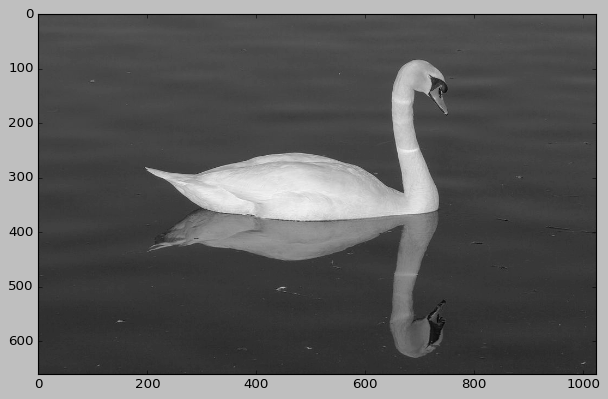

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F392BA0B110>


In [6]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [7]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(660, 1024)

In [8]:
U.shape

(660, 660)

In [9]:
V.shape

(1024, 1024)

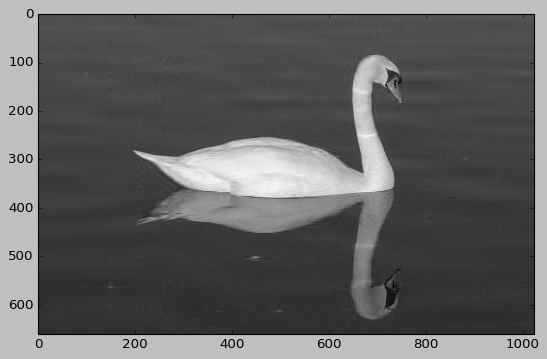

Felicidades la imagen está comprimida


In [10]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

Comenzaremos definiendo una función basada en el ejercicio anterior donde definiremos que hace cada paso:

In [64]:
plt.style.use('classic')

def f_reducirImagen(url, nvalue):

  # Abrimos una imagen que obtenemos de una url parámetro
  img = Image.open(urllib.request.urlopen(url))
  # Realizamos una conversión de la imagen por el método convert para cambiar todo a escala de grises "L" y alpha "A"
  imggray = img.convert('LA')
  # Convertimos los pixeles de la imagen a una lista
  imgmat = np.array(list(imggray.getdata(band=0)),float)
  print("------------------------ Pixeles en la imagen - --------------")
  print(imgmat.shape)
  print("------------------------ Muestra de la matriz LA ---------------")
  print(imgmat)
  
  # Cambiamos la dimensionalidad de los pixeles como vector a una matriz con dimensiones de la resolución de la imagen.
  imgmat.shape = (imggray.size[1],imggray.size[0])
  print("------------------------ Imagen original ----------------------")
  # Devolvemos la imagen desde la matriz
  plt.figure(figsize=(9,6))
  plt.imshow(imgmat, cmap='gray')
  plt.show()
  print(img)

  print("--------------Dimesinoes de la imagen-------------------------")
  # Obtenemos los valores por single value decomposition
  U,D,V = np.linalg.svd(imgmat)
  print(f"Shape: {imgmat.shape}")
  print(f"U: {U.shape}")
  print(f"V: {V.shape}")
  
  print("--------------Imagen compromida-------------------------")
  # Hacemos una reconstrucción de la imágen utilizando únicamente datos parciales de U, D, V
  reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
  # Usamos esa matriz reconstruida para mostrar la imagen (entre mas valores mas nitida la imagen)
  plt.imshow(reconstimg,cmap='gray')
  plt.show()


In [63]:
#imagen 1
url = 'https://upload.wikimedia.org/wikipedia/commons/7/7c/Flower_%28166180281%29.jpeg'
nvalue = 40
f_reducirImagen(url, nvalue)


LinAlgError: ignored

[ 64.  64.  64. ... 120. 119. 119.]
------------------------ Imagen original ----------------------


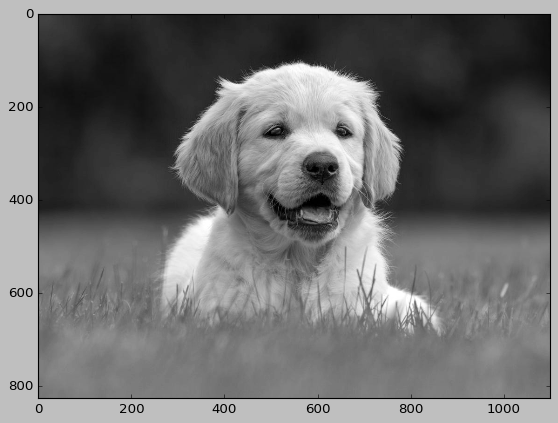

<PIL.Image.Image image mode=LA size=1100x825 at 0x7F392BA0B490>
--------------Dimesinoes de la imagen-------------------------
Shape: (825, 1100)
U: (825, 825)
V: (1100, 1100)
--------------Imagen compromida-------------------------


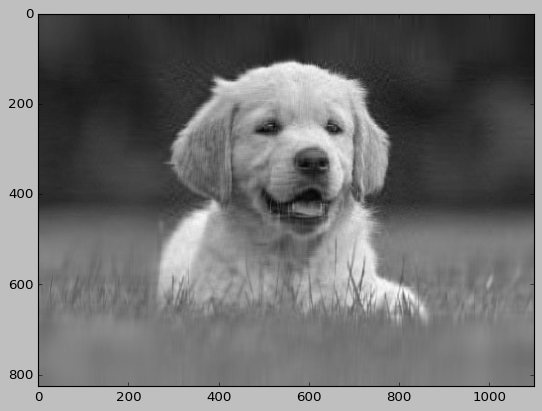

In [13]:
#imagen 2
url = 'https://upload.wikimedia.org/wikipedia/commons/1/18/Dog_Breeds.jpg'
nvalue = 40
f_reducirImagen(url, nvalue)


In [61]:
#imagen 3
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Wild_tree_in_nature.jpg/1024px-Wild_tree_in_nature.jpg'
nvalue = 80
f_reducirImagen(url, nvalue)

LinAlgError: ignored

Este ejercicio funciona por SVD que funciona como una reducción de datos basada en el principio de que toda matriz se puede expresar como $A = UΣV^T$ (Strang, 2016), donde: 

* U es una matriz ortogonal mxm
* $Σ$ es una mxn matriz diagonal
* $V^T$ es una matriz ortogonal nxn

(Rotación, estiramiento, rotación) (Strang, 2016)

Este método funciona similar a PCA (Wang, 2019); conforme se tomen más valores de las matrices, más información se gana, así: $U_{1}\sigma_{1}V_{1}^{T}$ contiene la mayor cantidad de finromación y las sucesivas añaden más información (Strang, 2016), esto es lo que visualmente también es comprobable, para muestra hagamos una demostración rápida con la imagen del perrito.



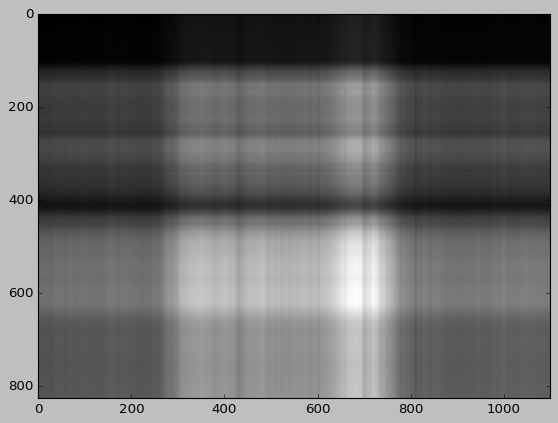

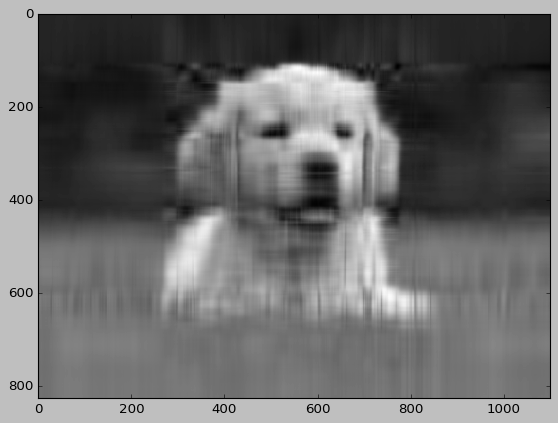

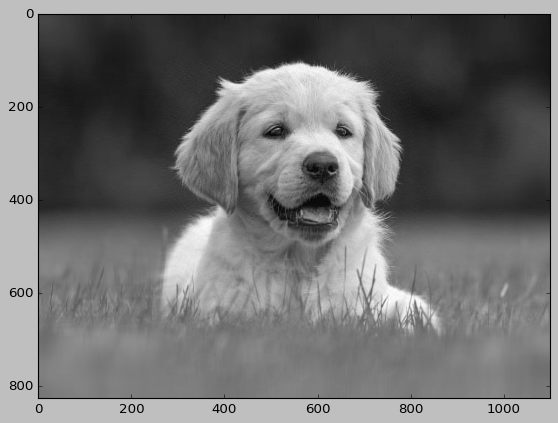

In [69]:
# Url del perrito
url = 'https://upload.wikimedia.org/wikipedia/commons/1/18/Dog_Breeds.jpg'
# Tomar imagen
img = Image.open(urllib.request.urlopen(url))
# Transformarla a blanco y negro
imggray = img.convert('LA')
# Transformarla a una lista de valores
imgmat = np.array(list(imggray.getdata(band=0)),float)
# Cambiarla a forma de matriz igual a la resolución de la imagen
imgmat.shape = (imggray.size[1],imggray.size[0])
# Obtener matriz UDV
U,D,V = np.linalg.svd(imgmat)

# Iterar sobre 1, 10 y 100
array_of_info = [1, 10, 100]
for n in array_of_info:
  # Crear canvas
  plt.figure(figsize=(9,6))
  # Tomar n observaciones de U, D, V
  reconstimg = np.matrix(U[:,:n])*np.diag(D[:n])*np.matrix(V[:n,:])
  # Recrear imagen con eso
  plt.imshow(reconstimg,cmap='gray')
  # Mostrar imagen
  plt.show()

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

Aquí se centran los features por Standar Scaler (Uno de los pasos iniciales de PCA) y se utliza la función desde scikit-learn; lo que van a hacer aquí es generar un eigenvector y eigenvalores que permitan nuevamente mover la determinante a 0, que sucede cuando ocurre una dimensión de dimensión; básicamente esto va a hacer un tipo de compresión de los valores.

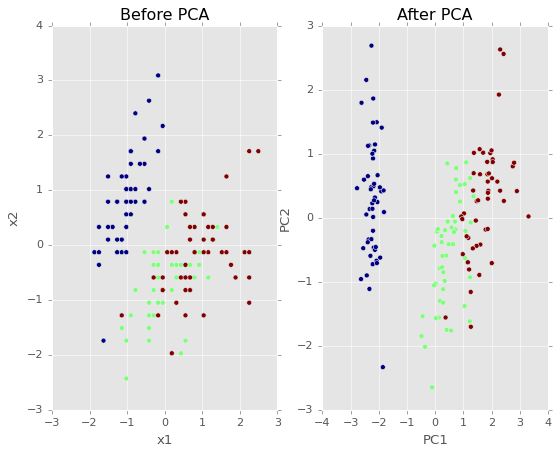

In [18]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Aquí observamos lo que nuestros PCA explican, un total de 0.96 de todo utilizando únicamente dos features

In [20]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [24]:
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [25]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [26]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [27]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

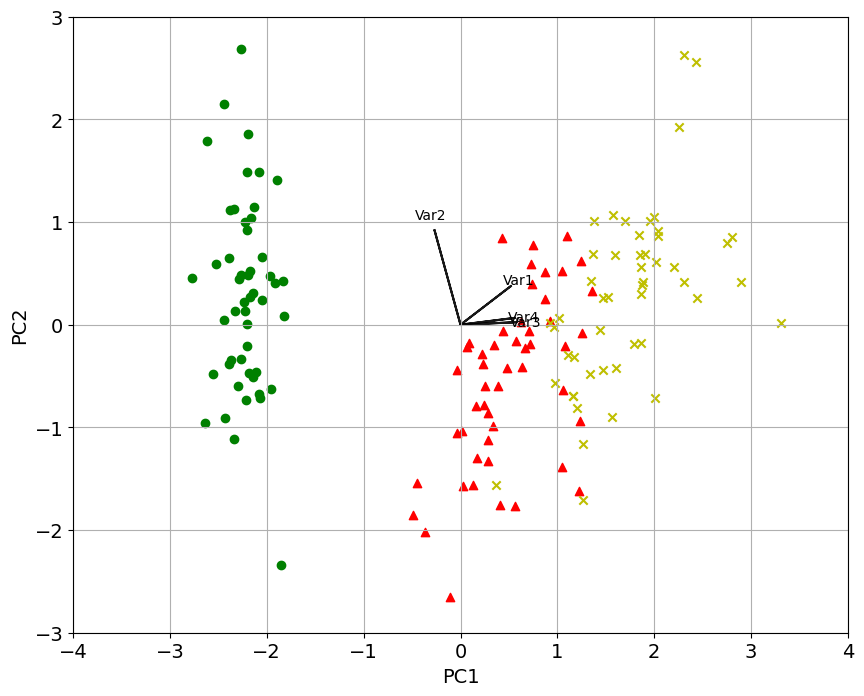

In [28]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [30]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [31]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

## Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Existen variables que se encuentran muchas veces relacionadas a una misma explicación intrínseca lo que las lleva a tener una alta correlación, cuando esto sucede, no es necesario utilizar todas; en este ejercicio se ve como se realiza una reducción del conjunto de features iris conformado por 4 variables y de ellos se propone dos componentes que explican casi todo lo del conjunto; en general esto hace más sencillo procesar todo e incluso visualizar, no es sencillo imaginar un plano sobre R4 pero es visualmente posible uno en R2 para PC1 y PC2.

##¿Qué es feature importance y para que nos sirve?

Es la importancia de cada factor reflejada dentro de los valores del eigenvector; entre mayor sea su valor, mayor sera su importancia (Loukas, 2021).


## ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

Como no es necesario utilizar todos los datos disponibles para hacer la explicación, más bien, como podemos reducir estos a nuevas variables por esta transformación lineal; ciertamente ofrece una ventaja poder visualizar los conjuntos para encontrar agrupamientos naturales, además lidia con el curse of dimensionality al hacer esto.

En general es un concepto muy bello eso de los eigenvectores y eigenvalores, sobre todo aplicado en este aspecto de PCA, en un principio me parece poco intuitivo, pero jugar con las imagenes me dio una idea de que era lo que pasaba a un nivel más intuitivo; al reducir las dimensiones en estos PCA podemos perder algo de información, cierto, pero tampoco necesitamos toda la información para inferir – Después de todo "Lucy" era reconocible con solo un valor de 20!!

## ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

Trabajo en retail y muchas veces tratan de combinar variables que tienen una correlación casi de 1 como usar "revenue" con "gross margin"; conceptualmente el conocimiento me ayuda a ver que no es necesario utilizar estas combinaciones e incluso si lo hacemos se puede hacer la reducción.

Utilizar PCA me parece de suma utilidad en mi rama ya que además de variables obviamente correlacionadas, existne muchas que no necesariamente lo son y el simple hecho de poder reducir para correr modelos de clasificación o regresión tiene utilidad pero el aspecto de entender como estas se relacionan y si se pueden o no reducir también generaría tremendos insights.

## Referencias



Loukas, S. (2021, 8  de Octubre). PCA clearly explained - how, when, why to use it and feature importance: A guide in python. Medium. Recuperado el 26 de octubre de 2022, de https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e 

Sanderson G. (2016). Eigenvectors and eigenvalues | Chapter 14, Essence of linear algebra. Recuperado el 26 de octubre de 2022, de https://www.youtube.com/watch?v=PFDu9oVAE-g. 


Strang, G. (2016, 6 de Mayo). Singular Value Decomposition (the SVD). Recuperado el 26 de octubre de 2022 de https://www.youtube.com/watch?v=mBcLRGuAFUk

Wang, Z. (2019, 5 de Septiembre). PCA and SVD explained with numpy. Medium. REcuperado el 26 de Octubre de 2022, de https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8 
